In [1]:
import time
import math
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
import numpy as np
import pandas as pd
import sklearn.preprocessing as prep

C:\Users\Yuvaraj\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df = pd.read_csv('C:/Users/Yuvaraj/Downloads/stock.csv')
df.head()

,open,high,low,volume,amount,close
0,20.64,20.64,20.37,16362363.0,3.350027e+08,20.56
1,20.92,20.92,20.60,21850597.0,4.520071e+08,20.64
2,21.00,21.15,20.72,26910139.0,5.628396e+08,20.94
3,20.70,21.57,20.70,64585536.0,1.363421e+09,21.02
4,20.60,20.70,20.20,45886018.0,9.382043e+08,20.70


In [3]:
def standard_scaler(X_train, X_test):
    train_samples, train_nx, train_ny = X_train.shape
    test_samples, test_nx, test_ny = X_test.shape
    
    X_train = X_train.reshape((train_samples, train_nx * train_ny))
    X_test = X_test.reshape((test_samples, test_nx * test_ny))
    
    preprocessor = prep.StandardScaler().fit(X_train)
    X_train = preprocessor.transform(X_train)
    X_test = preprocessor.transform(X_test)
    
    X_train = X_train.reshape((train_samples, train_nx, train_ny))
    X_test = X_test.reshape((test_samples, test_nx, test_ny))
    
    return X_train, X_test

In [4]:
def preprocess_data(stock, seq_len):
    amount_of_features = len(stock.columns)
    data = stock.values
    
    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index : index + sequence_length])
        
    result = np.array(result)
    row = round(0.9 * result.shape[0])
    train = result[: int(row), :]
    
    train, result = standard_scaler(train, result)
    
    X_train = train[:, : -1]
    y_train = train[:, -1][: ,-1]
    X_test = result[int(row) :, : -1]
    y_test = result[int(row) :, -1][ : ,-1]

    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], amount_of_features))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], amount_of_features))  

    return [X_train, y_train, X_test, y_test]

In [5]:
def build_model(layers):
    model = Sequential()


    model.add(LSTM(
        input_dim=layers[0],
        output_dim=layers[1],
        return_sequences=True))
    model.add(Dropout(0.4))

    model.add(LSTM(
        layers[2],
        return_sequences=False))
    model.add(Dropout(0.3))

    model.add(Dense(
        output_dim=layers[3]))
    model.add(Activation("linear"))

    start = time.time()
    model.compile(loss="mse", optimizer="rmsprop", metrics=['accuracy'])
    print("Compilation Time : ", time.time() - start)
    return model

In [6]:
window = 20
X_train, y_train, X_test, y_test = preprocess_data(df[:: -1], window)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (4648, 20, 6)
y_train (4648,)
X_test (516, 20, 6)
y_test (516,)


In [7]:
model = build_model([X_train.shape[2], window, 100, 1])

C:\Users\Yuvaraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
C:\Users\Yuvaraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 6), units=20)`
  


Compilation Time :  0.06678295135498047


C:\Users\Yuvaraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


In [8]:
model.fit(
    X_train,
    y_train,
    batch_size=768,
    epochs=100,
    validation_split=0.1,
    verbose=0)

In [9]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))

Train Score: 0.01 MSE (0.11 RMSE)
Test Score: 0.02 MSE (0.15 RMSE)


In [10]:
diff = []
ratio = []
pred = model.predict(X_test)
for u in range(len(y_test)):
    pr = pred[u][0]
    ratio.append((y_test[u] / pr) - 1)
    diff.append(abs(y_test[u] - pr))
    

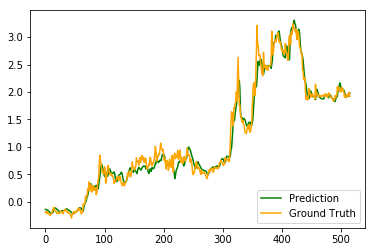

[[-0.13727146]
 [-0.14212447]
 [-0.14536294]
 [-0.14698666]
 [-0.15412883]
 [-0.16392784]
 [-0.1732818 ]
 [-0.18688866]
 [-0.19644095]
 [-0.20161316]
 [-0.20869088]
 [-0.20956184]
 [-0.20377977]
 [-0.18443939]
 [-0.15575558]
 [-0.12871867]
 [-0.11241633]
 [-0.11262512]
 [-0.11971042]
 [-0.13311388]
 [-0.14078173]
 [-0.15158287]
 [-0.16232923]
 [-0.17229854]
 [-0.17865163]
 [-0.18160434]
 [-0.17573702]
 [-0.16886194]
 [-0.16076374]
 [-0.16048422]
 [-0.16091095]
 [-0.1706815 ]
 [-0.15633024]
 [-0.14952211]
 [-0.13852409]
 [-0.13056211]
 [-0.12770429]
 [-0.13252804]
 [-0.14210263]
 [-0.15133171]
 [-0.15572461]
 [-0.1618156 ]
 [-0.17119554]
 [-0.18061608]
 [-0.19260494]
 [-0.2013354 ]
 [-0.2146515 ]
 [-0.21751317]
 [-0.21445176]
 [-0.20087086]
 [-0.18651018]
 [-0.17701633]
 [-0.17550409]
 [-0.1709117 ]
 [-0.1624009 ]
 [-0.14561239]
 [-0.1221281 ]
 [-0.11354107]
 [-0.10944644]
 [-0.11134027]
 [-0.11130705]
 [-0.12429601]
 [-0.14304614]
 [-0.16284585]
 [-0.17098914]
 [-0.09254871]
 [-0.04816

In [12]:


import matplotlib
import matplotlib.pyplot as plt

plt.plot(pred, color='green', label='Prediction')
plt.plot(y_test, color='orange', label='Ground Truth')
plt.legend(loc='lower right')
plt.show()
print(pred)